In [ ]:
!pip install medmnist

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/octmnist.npz'

# Load the dataset
dataset = np.load(file_path)

In [6]:
print(dataset.keys())

KeysView(NpzFile '/content/drive/MyDrive/octmnist.npz' with keys: train_images, val_images, test_images, train_labels, val_labels...)


In [7]:
# Dataset is already divided therefore no need to split it
x_train = dataset['train_images']
y_train = dataset['train_labels']
x_val = dataset['val_images']
y_val = dataset['val_labels']
x_test = dataset['test_images']
y_test = dataset['test_labels']

In [8]:
# normalizing the pixel values
x_train_normalized = x_train.astype('float32') / 255.0
x_val_normalized = x_val.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [9]:
print("Training set shapes:", x_train_normalized.shape, y_train.shape)
print("Validation set shapes:", x_val_normalized.shape, y_val.shape)
print("Test set shapes:", x_test_normalized.shape, y_test.shape)

Training set shapes: (97477, 28, 28) (97477, 1)
Validation set shapes: (10832, 28, 28) (10832, 1)
Test set shapes: (1000, 28, 28) (1000, 1)


In [10]:
# datasets are reshaped to have an additional dimension corresponding to the number of channels
# This is done to conform to the expected input shape of a CNN

x_train_normalized = x_train_normalized.reshape((-1, 28, 28, 1))
x_val_normalized = x_val_normalized.reshape((-1, 28, 28, 1))
x_test_normalized = x_test_normalized.reshape((-1, 28, 28, 1))

In [11]:
num_classes = np.unique(y_train).shape[0]
print(f'number of classes: {num_classes}')

number of classes: 4


In [12]:
sample_shape = x_train_normalized[0].shape
print(f'sample shape : {sample_shape}')

sample shape : (28, 28, 1)


In [13]:
dataset_shape = x_train_normalized.shape
print(f'shape of dataset: {dataset_shape}')

shape of dataset: (97477, 28, 28, 1)


In [14]:
!pip install tensorflow

In [15]:
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [40]:
num_classes = len(np.unique(y_train))  # Number of unique classes

# Defining the model architecture
class CNN(models.Model):
    def __init__(self, input_shape, num_classes):
        super(CNN, self).__init__()

        # 2 Convolutional layers each of size 3x3,'same' padding, and ReLU activation
        self.conv1 = layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape)
        self.conv2 = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')

        # MaxPooling layer with pool size 2x2
        self.pooling = layers.MaxPooling2D(pool_size=(2, 2))

        # Flattening the output for fully connected layers
        self.flatten = layers.Flatten()

        # Applying 2 Fully connected layers with ReLU activation function
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')

        # Output layer for final predictions
        self.output_layer = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        # Forward pass through the layers
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pooling(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        output = self.output_layer(x)

        return output

In [17]:
model = CNN(input_shape=(28, 28, 1), num_classes=num_classes)

# Compiling the model
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
batch_size = 64
epochs = 5

# fitting the model
history = model.fit(x_train_normalized, y_train,
                    validation_data=(x_val_normalized, y_val),
                    batch_size=batch_size,
                    epochs=epochs)

# Evaluating the model test cases
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/5
1524/1524 [==============================] - 26s 11ms/step - loss: 0.5693 - accuracy: 0.7959 - val_loss: 0.5051 - val_accuracy: 0.8263
Epoch 2/5
1524/1524 [==============================] - 10s 6ms/step - loss: 0.3717 - accuracy: 0.8696 - val_loss: 0.3614 - val_accuracy: 0.8757
Epoch 3/5
1524/1524 [==============================] - 10s 7ms/step - loss: 0.3109 - accuracy: 0.8898 - val_loss: 0.3099 - val_accuracy: 0.8918
Epoch 4/5
1524/1524 [==============================] - 9s 6ms/step - loss: 0.2626 - accuracy: 0.9082 - val_loss: 0.2990 - val_accuracy: 0.8968
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7945 - accuracy: 0.7250
Test Accuracy: 72.50%


32/32 [==============================] - 0s 5ms/step - loss: 0.7945 - accuracy: 0.7250
Test Accuracy: 72.50%
Test Loss: 0.7944735288619995


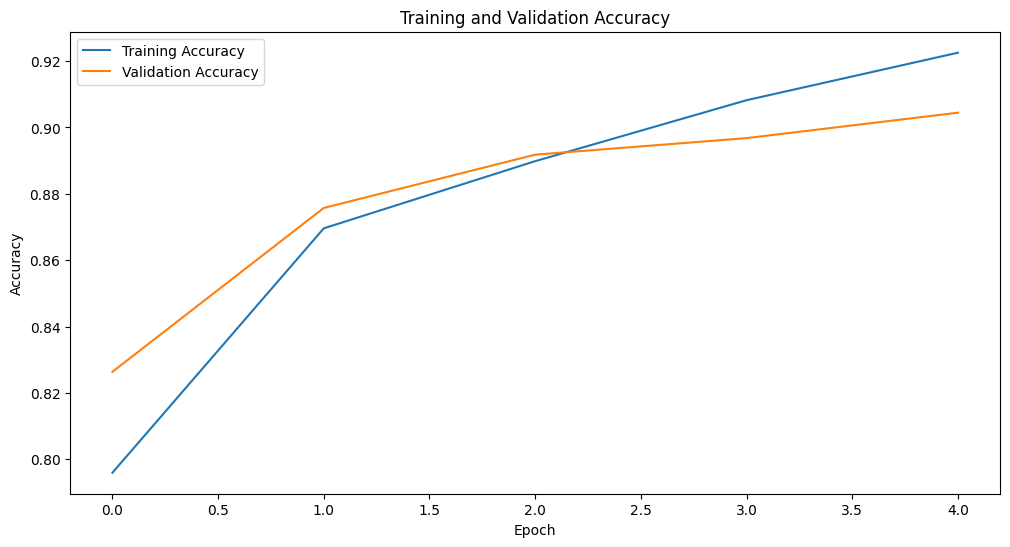

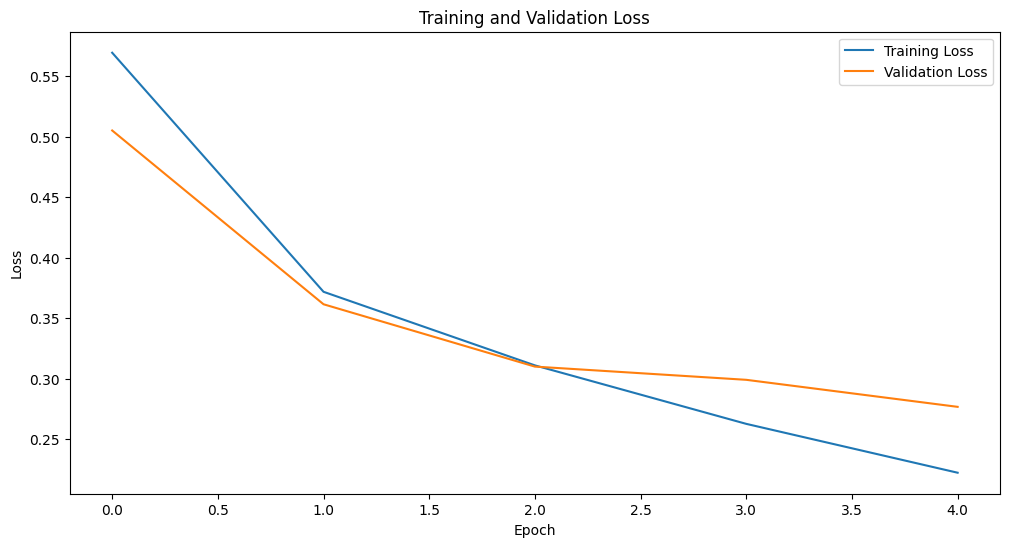

32/32 [==============================] - 0s 2ms/step
Confusion Matrix:
[[239   6   1   4]
 [ 55 181   5   9]
 [ 81  14  75  80]
 [  8   8   4 230]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.62      0.96      0.76       250
           1       0.87      0.72      0.79       250
           2       0.88      0.30      0.45       250
           3       0.71      0.92      0.80       250

    accuracy                           0.73      1000
   macro avg       0.77      0.72      0.70      1000
weighted avg       0.77      0.72      0.70      1000



In [21]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# final testing accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# generate a confusion matrix using the model's predictions on the test set
y_pred = model.predict(x_test_normalized)
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(conf_matrix)

# precision, recall, F1 score etc. using classification report
evaluation_rep = classification_report(y_test, np.argmax(y_pred, axis=1))
print('Evaluation Report:')
print(evaluation_rep)

## Regularization

In [22]:
from tensorflow.keras import regularizers

In [23]:
class CNN(models.Model):
    def __init__(self, input_shape, num_classes, l2_reg=0.01):
        super(CNN, self).__init__()

        # 2 Convolutional layers each of size 3x3,'same' padding, and ReLU activation and L2 regularization
        self.conv1 = layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu',
                                   input_shape=input_shape, kernel_regularizer=regularizers.l2(l2_reg))
        self.conv2 = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu',
                                   kernel_regularizer=regularizers.l2(l2_reg))

        # MaxPooling layer with pool size 2x2
        self.pooling = layers.MaxPooling2D(pool_size=(2, 2))

        # Flattening the output for fully connected layers
        self.flatten = layers.Flatten()

        # Applying 2 Fully connected layers with ReLU activation function and L2 regularization
        self.fc1 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))
        self.fc2 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))

        # Output layer for final predictions
        self.output_layer = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg))

    def call(self, x):
      # forward Pass through the Layers
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pooling(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        output = self.output_layer(x)

        return output

In [41]:
optimizer = optimizers.Adam()

# compiling the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# fitting the model
history = model.fit(x_train_normalized, y_train,
                    validation_data=(x_val_normalized, y_val),
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/5
1524/1524 [==============================] - 12s 7ms/step - loss: 0.1879 - accuracy: 0.9342 - val_loss: 0.3044 - val_accuracy: 0.8993
Epoch 2/5
1524/1524 [==============================] - 10s 7ms/step - loss: 0.1595 - accuracy: 0.9448 - val_loss: 0.2825 - val_accuracy: 0.9094
Epoch 3/5
1524/1524 [==============================] - 10s 6ms/step - loss: 0.1351 - accuracy: 0.9534 - val_loss: 0.3123 - val_accuracy: 0.9091
Epoch 4/5
1524/1524 [==============================] - 10s 7ms/step - loss: 0.1152 - accuracy: 0.9599 - val_loss: 0.3030 - val_accuracy: 0.9149
Epoch 5/5
1524/1524 [==============================] - 10s 7ms/step - loss: 0.0959 - accuracy: 0.9673 - val_loss: 0.3648 - val_accuracy: 0.8937


In [26]:
# evaluating the test cases
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 0s 3ms/step - loss: 1.3841 - accuracy: 0.6880
Test Accuracy: 68.80%


32/32 [==============================] - 0s 3ms/step - loss: 1.3841 - accuracy: 0.6880
Test Accuracy: 68.80%
Test Loss: 1.3840945959091187


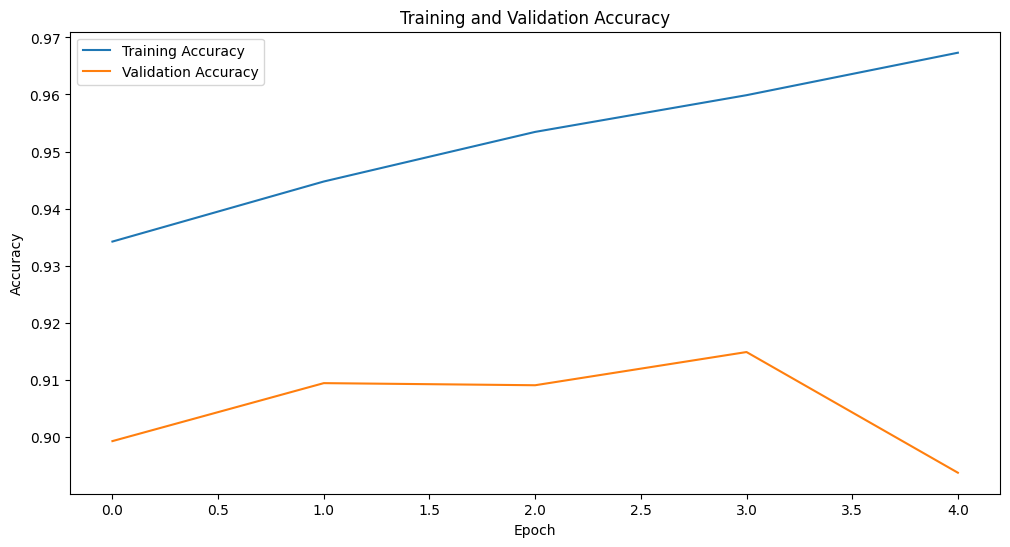

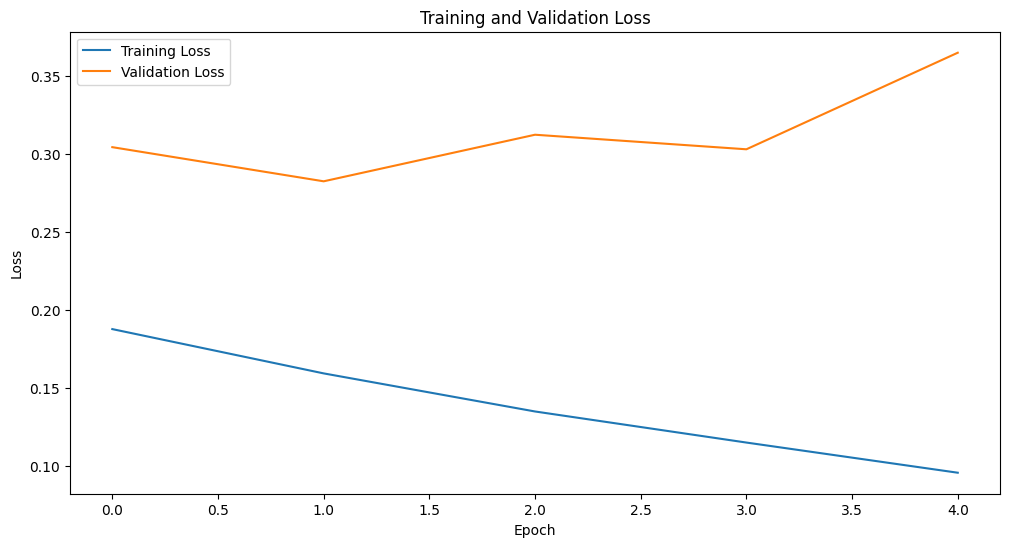

32/32 [==============================] - 0s 2ms/step
Confusion Matrix:
[[235   2   8   5]
 [ 89 141   6  14]
 [ 90   8  99  53]
 [ 11   7  19 213]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.55      0.94      0.70       250
           1       0.89      0.56      0.69       250
           2       0.75      0.40      0.52       250
           3       0.75      0.85      0.80       250

    accuracy                           0.69      1000
   macro avg       0.74      0.69      0.68      1000
weighted avg       0.74      0.69      0.68      1000



In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# final testing accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# training and validation accuracy vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate a confusion matrix using the model's predictions on the test set.
y_pred = model.predict(x_test_normalized)
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(conf_matrix)

# precision, recall, F1 score etc. using classification report
evaluation_rep = classification_report(y_test, np.argmax(y_pred, axis=1))
print('Evaluation Report:')
print(evaluation_rep)

## Dropouts

In [28]:
from tensorflow.keras.layers import Dropout

class CNN(models.Model):
    def __init__(self, input_shape, num_classes, dropout_rate=0.5):
        super(CNN, self).__init__()

        # 2 Convolutional layers each of size 3x3,'same' padding, and ReLU activation
        self.conv1 = layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape)
        self.conv2 = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')

        # MaxPooling layer with pool size 2x2
        self.pooling = layers.MaxPooling2D(pool_size=(2, 2))

        # Flattening the output for fully connected layers
        self.flatten = layers.Flatten()

        # Applying 2 Fully connected layers with ReLU activation function
        self.fc1 = layers.Dense(128, activation='relu')
        # Dropout layer after the 1st fully connected layer
        self.dropout1 = Dropout(rate=dropout_rate)

        self.fc2 = layers.Dense(64, activation='relu')
        # Dropout layer after the 1st fully connected layer
        self.dropout2 = Dropout(rate=dropout_rate)

        # Output layer for final predictions
        self.output_layer = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        # Forward Pass
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pooling(x)
        x = self.flatten(x)

        x = self.fc1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.dropout2(x)

        output = self.output_layer(x)

        return output


In [29]:
optimizer = optimizers.Adam()
# compiling the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Fitting the model
history = model.fit(x_train_normalized, y_train,
                    validation_data=(x_val_normalized, y_val),
                    batch_size=batch_size,
                    epochs=epochs)

# eavluating the test cases
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/5
1524/1524 [==============================] - 12s 7ms/step - loss: 0.0865 - accuracy: 0.9696 - val_loss: 0.3415 - val_accuracy: 0.9128
Epoch 2/5
1524/1524 [==============================] - 10s 6ms/step - loss: 0.0722 - accuracy: 0.9750 - val_loss: 0.3680 - val_accuracy: 0.9147
Epoch 3/5
1524/1524 [==============================] - 10s 6ms/step - loss: 0.0644 - accuracy: 0.9780 - val_loss: 0.3652 - val_accuracy: 0.9148
Epoch 4/5
1524/1524 [==============================] - 10s 7ms/step - loss: 0.0566 - accuracy: 0.9808 - val_loss: 0.3829 - val_accuracy: 0.9093
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 1.7606 - accuracy: 0.7000
Test Accuracy: 70.00%


32/32 [==============================] - 0s 3ms/step - loss: 1.7606 - accuracy: 0.7000
Test Accuracy: 70.00%
Test Loss: 1.7605692148208618


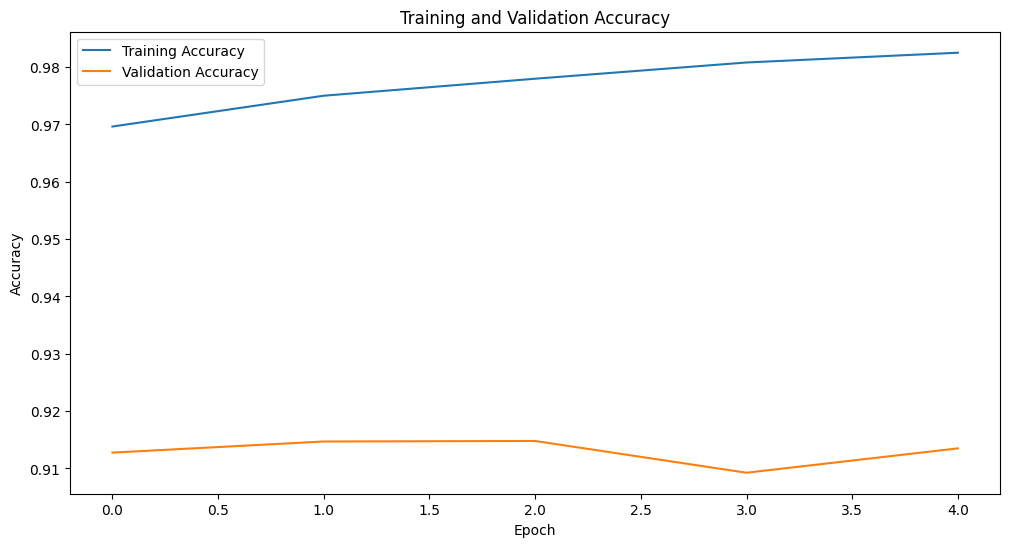

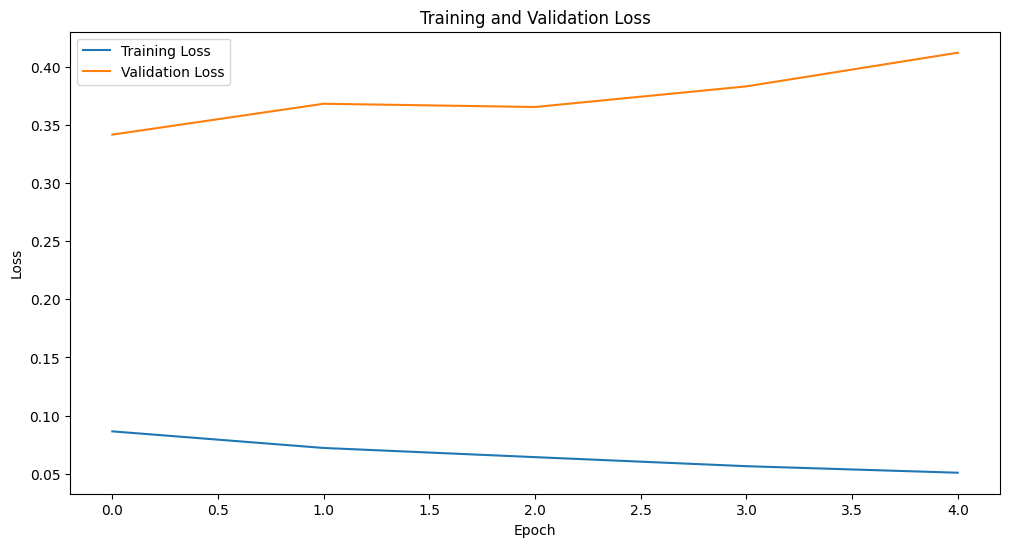

32/32 [==============================] - 0s 2ms/step
Confusion Matrix:
[[236   5   2   7]
 [ 68 160   4  18]
 [ 85   8  75  82]
 [  8   5   8 229]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       250
           1       0.90      0.64      0.75       250
           2       0.84      0.30      0.44       250
           3       0.68      0.92      0.78       250

    accuracy                           0.70      1000
   macro avg       0.75      0.70      0.68      1000
weighted avg       0.75      0.70      0.68      1000



In [31]:
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# final testing accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# training and validation accuracy vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate a confusion matrix using the model's predictions on the test set.
y_pred = model.predict(x_test_normalized)
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(conf_matrix)

# precision, recall, F1 score etc. using classification report
evaluation_rep = classification_report(y_test, np.argmax(y_pred, axis=1))
print('Evaluation Report:')
print(evaluation_rep)

## Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
num_classes = len(np.unique(y_train))  # Number of unique classes

class CNN(models.Model):
    def __init__(self, input_shape, num_classes):
        super(CNN, self).__init__()

        # 2 Convolutional layers each of size 3x3,'same' padding, and ReLU activation
        self.conv1 = layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape)
        self.conv2 = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')

        # MaxPooling layer with pool size 2x2
        self.pooling = layers.MaxPooling2D(pool_size=(2, 2))

        # Flattening the output for fully connected layers
        self.flatten = layers.Flatten()

        # Applying 2 Fully connected layers with ReLU activation function
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')

        # Output layer for final predictions
        self.output_layer = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
      # forward pass
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pooling(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        output = self.output_layer(x)

        return output

In [35]:
optimizer = optimizers.Adam()
# compiling the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [36]:
# fitting the model
history = model.fit(x_train_normalized, y_train,
                    validation_data=(x_val_normalized, y_val),
                    batch_size=batch_size,
                    epochs=15,
                    callbacks=[early_stopping])

# evaluating the test cases
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/15
1524/1524 [==============================] - 12s 7ms/step - loss: 0.0495 - accuracy: 0.9830 - val_loss: 0.3776 - val_accuracy: 0.9153
Epoch 2/15
1524/1524 [==============================] - 10s 7ms/step - loss: 0.0427 - accuracy: 0.9852 - val_loss: 0.4651 - val_accuracy: 0.9025
Epoch 3/15
1524/1524 [==============================] - 10s 7ms/step - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.4113 - val_accuracy: 0.9062
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 1.4056 - accuracy: 0.7240
Test Accuracy: 72.40%


model weights saved since it has the best accuracy

In [38]:
model.save_weights("/content/drive/MyDrive/earlyStopping_model.h5")

print("model saved as earlyStopping_model.h5")

model saved as earlyStopping_model.h5


32/32 [==============================] - 0s 3ms/step - loss: 1.4056 - accuracy: 0.7240
Test Accuracy: 72.40%
Test Loss: 1.405642032623291


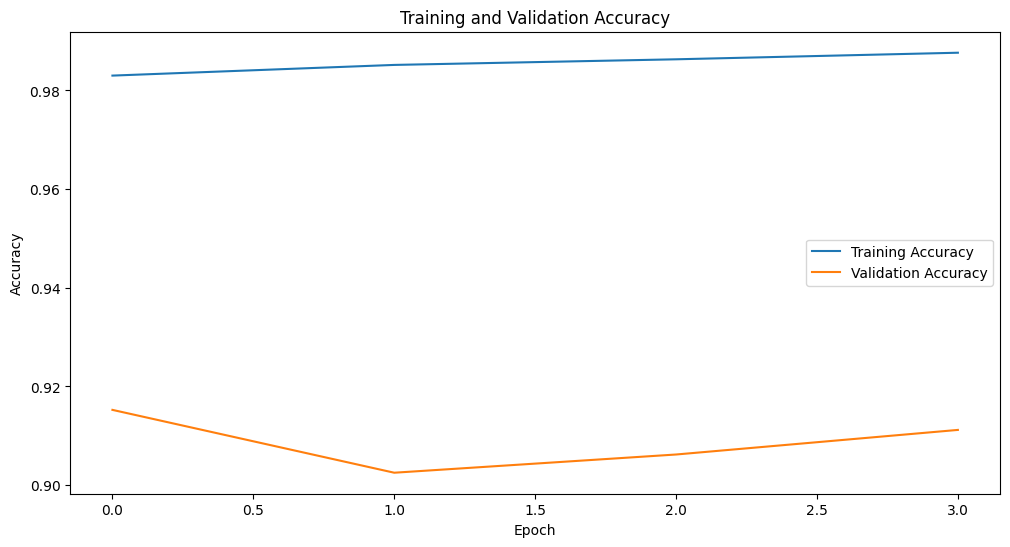

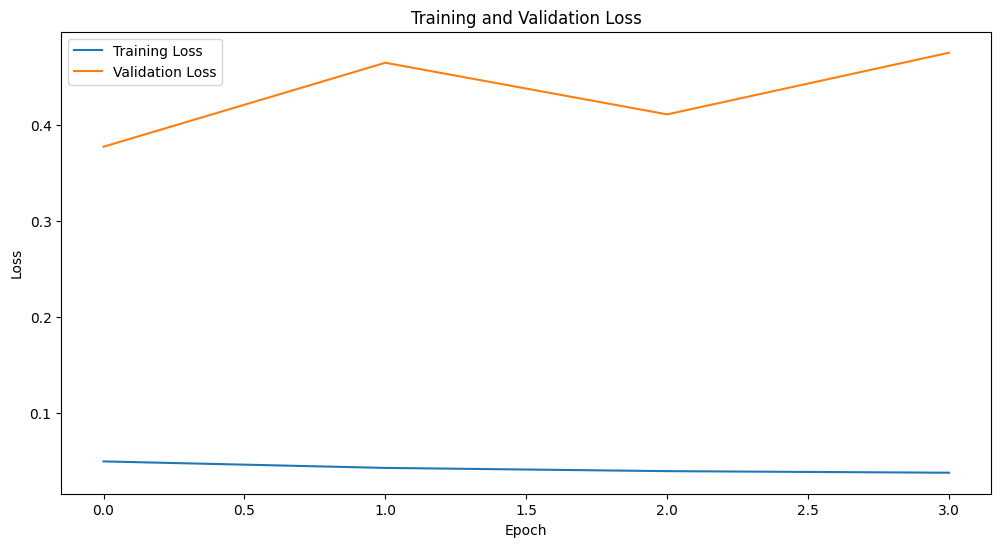

32/32 [==============================] - 0s 2ms/step
Confusion Matrix:
[[231  10   5   4]
 [ 48 183   5  14]
 [ 85   4  79  82]
 [  8   4   7 231]]
Evaluation Report:
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       250
           1       0.91      0.73      0.81       250
           2       0.82      0.32      0.46       250
           3       0.70      0.92      0.80       250

    accuracy                           0.72      1000
   macro avg       0.76      0.72      0.70      1000
weighted avg       0.76      0.72      0.70      1000



In [39]:

training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# final testing accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# training and validation accuracy vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss vs epochs
plt.figure(figsize=(12, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate a confusion matrix using the model's predictions on the test set.
y_pred = model.predict(x_test_normalized)
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(conf_matrix)

# precision, recall, F1 score etc. using classification report
evaluation_rep = classification_report(y_test, np.argmax(y_pred, axis=1))
print('Evaluation Report:')
print(evaluation_rep)